In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# Read the Mouse and Drug Data and the Clinical Trial Data
#clinical_trial.head()

# mouse_drug.head()

# Combine the data into a single dataset
data = clinical_trial.merge(mouse_drug, on = "Mouse ID", how = "outer")

# Display the data table for preview

data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_value = data.groupby(['Drug','Timepoint'])
# Convert to DataFrame
mean_value = mean_value.mean()
# Preview DataFrame
mean_value = mean_value.drop('Metastatic Sites', axis = 1)
mean_value = mean_value.reset_index()
mean_value.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_E = data.groupby(['Drug','Timepoint'])
standard_E = standard_E.sem()
standard_E = standard_E.drop('Metastatic Sites', axis = 1)
standard_E = standard_E.drop('Mouse ID', axis = 1)
# Convert to DataFrame
# Preview DataFrame
standard_E = standard_E.reset_index()
standard_E.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
reformat = mean_value.pivot_table(values = 'Tumor Volume (mm3)', columns = 'Drug', index = 'Timepoint')
reformat.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


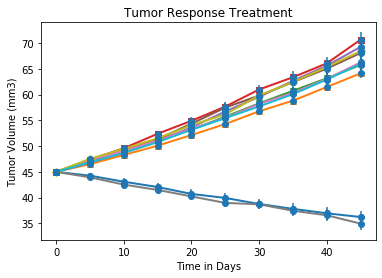

In [5]:
# Generate the Plot (with Error Bars)
marker = ['H', '^', 'v', 's', '3', '.', '1', '_','D','+']
count = 0
for i in reformat.columns:
    
    a = plt.plot(reformat.index, reformat[i] ,marker = marker[count], label = reformat.columns, linewidth = 2)
    count = count +1
# Save the Figure
plt.errorbar(mean_value['Timepoint'], mean_value['Tumor Volume (mm3)'], standard_E['Tumor Volume (mm3)'], fmt = "o")
plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response Treatment")
plt.savefig("tumor drug data")

In [6]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_stat = data.groupby(['Drug','Timepoint']).mean()
# Convert to DataFrame

# Preview Data
meta = mean_stat['Metastatic Sites']
meta = pd.DataFrame(meta)
meta.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [16]:
standard_meta = data.groupby(['Drug','Timepoint'])
standard_meta = standard_meta.sem()
standard_meta = standard_meta.drop('Tumor Volume (mm3)', axis = 1)
standard_meta = standard_meta.drop('Mouse ID', axis = 1)
standard_meta.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [17]:
# Minor Data Munging to Re-Format the Data Frames
reformat_meta = meta.pivot_table(values = 'Metastatic Sites', columns = 'Drug', index = 'Timepoint')
reformat_meta.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


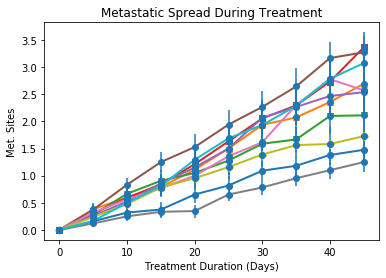

In [53]:
# Generate the Plot (with Error Bars)
marker = ['H', '^', 'v', 's', '3', '.', '1', '_','D','+']
count = 0
for i in reformat_meta.columns:
    ab = plt.plot(reformat_meta.index, reformat_meta[i] , marker = marker[count],label = reformat_meta.columns,linewidth = 2)
    count = count + 1
# Save the Figure
plt.errorbar(mean_value['Timepoint'], meta['Metastatic Sites'], standard_meta['Metastatic Sites'], fmt = "o")

plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")
plt.savefig("Metastatic Data")
# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [19]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
counting = data.groupby(['Drug','Timepoint'])
# Convert to DataFrame
counting = counting.count()
counting['Mouse Count'] = counting['Mouse ID']
counting = counting.drop('Tumor Volume (mm3)',axis = 1)
counting = counting.drop('Metastatic Sites',axis = 1)
counting = counting.drop('Mouse ID',axis = 1)

counting = counting.reset_index()
counting.head()
# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [51]:
# Minor Data Munging to Re-Format the Data Frames
reformat_count = counting.pivot_table(values = 'Mouse Count', columns = 'Drug', index = 'Timepoint')
reformat_count
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [55]:
percent = 100*(reformat_count/reformat_count.iloc[0])

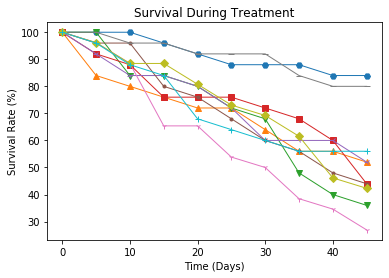

In [22]:
# Generate the Plot (Accounting for percentages)
marker = ['H', '^', 'v', 's', '3', '.', '1', '_','D','+']
count = 0
for i in percent.columns:
    bc = plt.plot(percent.index, percent[i], marker = marker[count], label = percent.columns,linewidth = 1)
    count = count + 1
# Save the Figure
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")
plt.savefig("Mouse Percentage")
# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [23]:
# Calculate the percent changes for each drug
percent_volume = 100*((reformat.iloc[-1]-reformat.iloc[0])/reformat.iloc[0])
# Display the data to confirm
percent_volume
# changed = pd.DataFrame({'Drug':['Capomulin','Infubinol','']})
new_percent_volume = pd.Series(percent_volume)
new_percent_volume = new_percent_volume.reset_index()
new_percent_volume['Percent'] = new_percent_volume[0]
new_percent_volume = new_percent_volume.drop(0,axis = 1)
new_percent_volume

,Drug,Percent
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [24]:
changes = []
good = []
bad = []
for i in range(len(percent_volume)):
    changes.append(percent_volume[i])
    if percent_volume[i]>0:
                    bad.append(percent_volume[i])
    else:
                   good.append(percent_volume[i])


[-19.475302667894155, 42.516491855897414, 46.12347172785184, 57.02879468660604, 53.923347134769195, 51.29796048315153, 47.24117486320634, -22.32090046276666, 52.085134287898995, 46.57975086509522]


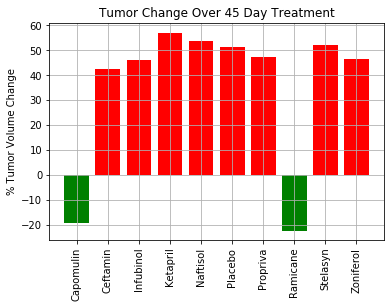

In [54]:
# Store all Relevant Percent Changes into a Tuple
axis = np.arange(len(good))
axis2 = np.arange(len(bad))
axis3 = np.arange(len(changes))
print(changes)
# Splice the data between passing and failing drugs
plt.bar(new_percent_volume['Drug'], new_percent_volume['Percent'],color = (new_percent_volume['Percent']<0).map({True:'g', False:'r'}))
# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes

plt.xticks(rotation = 90)
# Call functions to implement the function calls

# Save the Figure

plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment')
plt.grid()
# Show the Figure
plt.savefig('Bar Graph')

![Metastatic Spread During Treatment](../Images/change.png)

Observations:

-From the start we notice the decrease in tumor volume from Capomulin and Ramicane being the only drugs having any effectiveness whereas the other drugs either influenced or just left the tumor to grow.

-None of the drugs really slowed down the spread of the metastatic sites however if we look at the graph after that the previously mentioned drugs (Capomulin and Ramicane) did have a good effect on the mice's rate of survival where they were having a good effect on the mice.

-The standard errors for the drugs confirm the effectiveness since they're lower than the other drugs compared

